# First Classification

0. Import usual libraries

# TODO
### Faire Label Encoding
### Voir la fin du code

In [7]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler # OneHotEncoder,, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    # f1_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    # classification_report
)
import matplotlib.pyplot as plt



# import numpy as np
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression

# import plotly.graph_objects as go
# import plotly.io as pio


1. Download the following data using this link : ```https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/ex2data1.txt``` and put it into a DataFrame

Pay attention to the header of the DataFrame, there's something annoying with it! Look at the documentation of `pd.read_csv()` to find a way of solving the problem 🤓

In [8]:


df = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/ex2data1.txt", header=None)
df.head()




,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


2. Rename the columns using the following names : 

"Col_1" / "Col_2" / "Target"

In [9]:
# df.rename(index = {0: 'Col_1', 1: 'Col_2', 2:"Target"}, inplace = True)
df.columns=["Col1", "Col2", "Target"]
df.head()

,Col1,Col2,Target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


3. Visualize the data as a scatter plot where the two different classes are displayed with different colors.

In [10]:
# fig = px.scatter(df, x="Col1", y="Col2", color="Target", width=800, height=400)
fig = px.scatter(df, x = 'Col1', y = 'Col2', color = df['Target'].astype('str'), labels = {'color': 'Target'}, width=800, height=400)
fig.show()

4. Separate X and y into two different objects.

In [11]:
features_list = ["Col1", "Col2"]
target_variable = "Target"

X = df.loc[:, features_list]
Y = df.loc[:, target_variable]


5. Split the data into a train set and a test set

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


6. Do you think that the two variables "Col_1" and "Col_2" would be good predictors of the target?

In [13]:
# num_features = ["Age", "Salary"]
for f in features_list:
    fig = px.histogram(df, f, color="Target", facet_row="Target", histnorm="probability", width=800, height=400)
    fig.show()

7. Analyze the explanatory variables, what preprocessings are necessary? Make the preprocessings.

In [14]:
df.describe(include="all")

,Col1,Col2,Target
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [15]:
100 * df.isnull().sum() / len(df)

Col1      0.0
Col2      0.0
Target    0.0
dtype: float64

Some good news:
* There are no missing values in this dataset --> no imputation needed
* Although we're dealing with a classification problem, the _Target_ is alrady encoded as 0s and 1s, so we don't need to use the LabelEncoder
* All the features (_Col1_ and _Col2_) are numeric, so we just want to apply a StandardScaler to the whole array X

In [16]:
# numeric_features = df.select_dtypes(include="number").columns
# categorical_features = df.select_dtypes(exclude="number").columns
numeric_features=["Col1", "Col2"]

In [17]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(
    steps=[
        # (
        #     "imputer",
        #     SimpleImputer(strategy="mean"),
        # ),  # missing values will be replaced by columns' mean
        ("scaler", StandardScaler()),
    ]
)

In [18]:
# Create pipeline for categorical features
# categorical_transformer = OneHotEncoder(
#     drop="first"
# )  # no missing values in categorical data, so we only need the OHE

In [19]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
feature_encoder = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        # ("cat", categorical_transformer, categorical_features),
    ]
)

In [20]:
X_train = feature_encoder.fit_transform(X_train)
print(X_train[0:5,:].round(2))

[[-0.83 -0.78]
 [-0.68  0.17]
 [ 0.49  1.05]
 [-0.42 -0.37]
 [ 1.21 -0.03]]


In [21]:
X_test = feature_encoder.transform(X_test)
print(X_test[0:5,:].round(2))

[[ 0.46  1.25]
 [-0.18  1.64]
 [ 0.68  0.48]
 [ 1.   -0.5 ]
 [-0.68 -0.17]]


8. Use the LogisticRegression function from sklearn in order to create a model instance and train it.

In [22]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)


LogisticRegression()

9. What's the accuracy on the train set ? and on the test set ?

Find a way of evaluating the scores without explicitely computing the model's predictions.

In [23]:
Y_train_pred = classifier.predict(X_train)
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))



accuracy on training set :  0.875


In [24]:
Y_test_pred = classifier.predict(X_test)
print("accuracy on training set : ", accuracy_score(Y_test, Y_test_pred))


accuracy on training set :  0.95


10. What's the average score with a cross-validation using K=10, what's the score's standard deviation?

In [25]:
scores = cross_val_score(classifier,X_train, Y_train, cv=10)
avg = scores.mean()
std = scores.std()

print("avg", avg.round(3))
print("std", std.round(3))

avg 0.875
std 0.137


11. Is the model underfitting/overfitting?

12. Create objects containing the model's predictions on the train/test sets, as well as the estimated probabilities

In [26]:
Y_train_pred = classifier.predict(X_train)
print(Y_train_pred)

Y_train_proba = classifier.predict_proba(X_train)
print(Y_train_proba)


[0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 1 1]
[[0.90927094 0.09072906]
 [0.55116875 0.44883125]
 [0.01889995 0.98110005]
 [0.65851648 0.34148352]
 [0.03073989 0.96926011]
 [0.77996864 0.22003136]
 [0.47171552 0.52828448]
 [0.34752387 0.65247613]
 [0.95242695 0.04757305]
 [0.13355303 0.86644697]
 [0.94363062 0.05636938]
 [0.22861149 0.77138851]
 [0.00449092 0.99550908]
 [0.24313367 0.75686633]
 [0.00981306 0.99018694]
 [0.30083165 0.69916835]
 [0.03700576 0.96299424]
 [0.0227522  0.9772478 ]
 [0.91574697 0.08425303]
 [0.12326295 0.87673705]
 [0.36776694 0.63223306]
 [0.75125604 0.24874396]
 [0.84423008 0.15576992]
 [0.70685058 0.29314942]
 [0.70533985 0.29466015]
 [0.84240213 0.15759787]
 [0.00546644 0.99453356]
 [0.76794929 0.23205071]
 [0.06987808 0.93012192]
 [0.37513358 0.62486642]
 [0.19874289 0.80125711]
 [0.03947712 0.96052288]
 [0.90733186 0.09266814]
 [0.0091401

In [27]:
Y_test_pred = classifier.predict(X_test)
print(Y_test_pred)

Y_test_proba = classifier.predict_proba(X_test)
print(Y_test_proba)

[1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1]
[[0.01384498 0.98615502]
 [0.02553222 0.97446778]
 [0.03621767 0.96378233]
 [0.10850643 0.89149357]
 [0.69819491 0.30180509]
 [0.74123646 0.25876354]
 [0.69300444 0.30699556]
 [0.25613365 0.74386635]
 [0.64577471 0.35422529]
 [0.93753614 0.06246386]
 [0.9862518  0.0137482 ]
 [0.11838647 0.88161353]
 [0.92759191 0.07240809]
 [0.094744   0.905256  ]
 [0.99074432 0.00925568]
 [0.01175353 0.98824647]
 [0.51743553 0.48256447]
 [0.01816178 0.98183822]
 [0.07474831 0.92525169]
 [0.00252974 0.99747026]]


13. Display the confusion matrix derived from the predictions performed by your model on the training data, do the same on your test data. What do you think of your model's performance, do you think it would generalize well on unknown data?

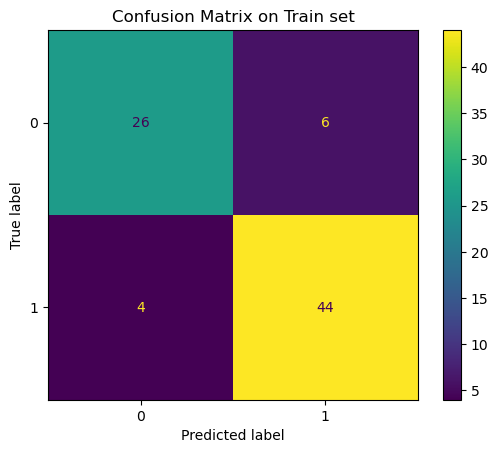

In [28]:
_, ax = plt.subplots()  
ax.set(
    title="Confusion Matrix on Train set"
)  
ConfusionMatrixDisplay.from_estimator(
    classifier, X_train, Y_train, ax=ax
)  
plt.show()



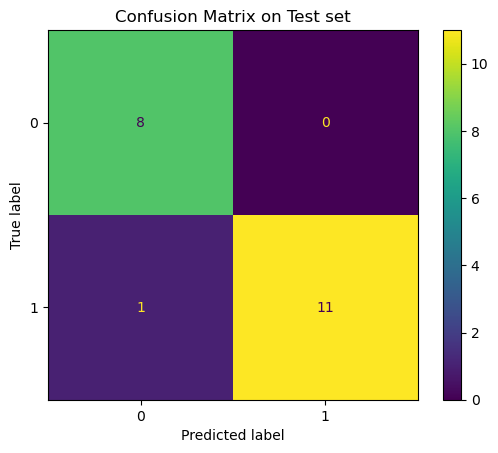

In [29]:
_, ax = plt.subplots()  
ax.set(
    title="Confusion Matrix on Test set"
)  
ConfusionMatrixDisplay.from_estimator(
    classifier, X_test, Y_test, ax=ax
)  
plt.show()

**From the questions above, we can deduce that the generalized performances are very good ! Indeed, the test accuracy is comparable to the train accuracy and we can see in the confusion matrix that the prediction errors are very rare 🥳🥳**

14. Produce the ROC curve for the train set and the test set

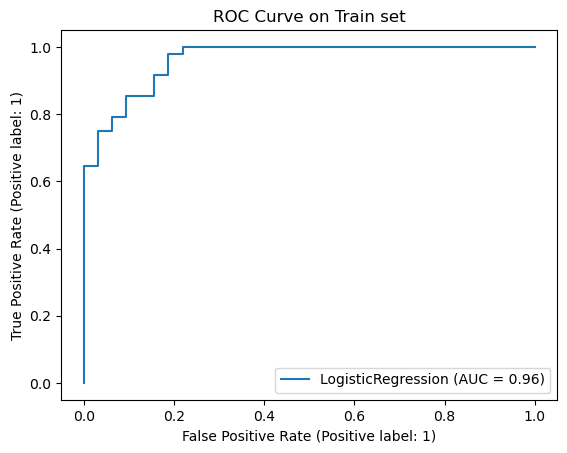

In [30]:
_, ax = plt.subplots()  
ax.set(
    title="ROC Curve on Train set"
)  
RocCurveDisplay.from_estimator(
    classifier, X_train, Y_train, ax=ax
)  
plt.show()



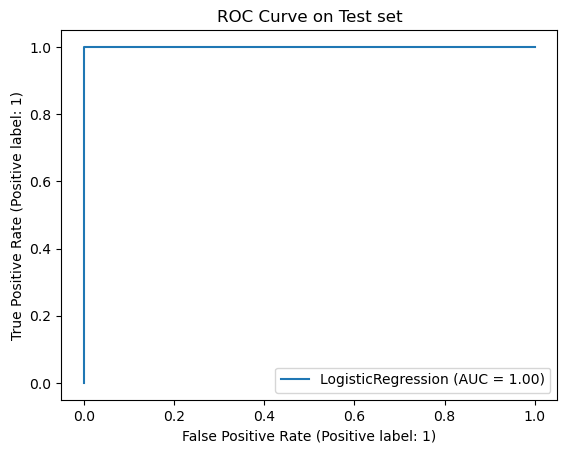

In [31]:
_, ax = plt.subplots()  
ax.set(
    title="ROC Curve on Test set"
)  
RocCurveDisplay.from_estimator(
    classifier, X_test, Y_test, ax=ax
)  
plt.show()

**The area under the curves is quite close to 1. This means that the model is robust as it does not depend on the choice of the threshold used in the logistic regression.**

15. Create a DataFrame named predictions_df_train that contains the following values on train set:
* explanatory variables "Col_1" and "Col_2"
* the target variable Y
* the predictions Y_pred 
* the estimated probabilites from the classifier. 

Sort the values according to the probabilities (in ascending order).

In [35]:
print(type(X_train), X_train.ndim)
print(type(Y_train), Y_train.ndim)
print(type(Y_train_pred), Y_train_pred.ndim)
print(type(Y_train_proba), Y_train_proba.ndim)
print(type(Y_train), Y_train.ndim)

<class 'numpy.ndarray'> 2
<class 'pandas.core.series.Series'> 1
<class 'numpy.ndarray'> 1
<class 'numpy.ndarray'> 2
<class 'pandas.core.series.Series'> 1


In [32]:
# prediction_df_train = df[["Col1", "Col2"]]
# prediction_df_train = pd.DataFrame[X_train, ["Col1", "Col2"]]
# prediction_df_train["Y"] = Y
# prediction_df_train["Y_pred"] = pd.DataFrame(Y_train_pred)

# On a 2 colonnes avec les probas que ce soit 0 ou 1 dans proba
# prediction_df_train["Proba"] = pd.DataFrame(Y_train_proba[:,1])


# prediction_df_train.sort_values(by=["Proba"])

# prediction_df_train.head()


predictions_df_train = pd.DataFrame(X_train, columns = ['Col_1', 'Col_2'])
predictions_df_train["Y"] = Y_train.tolist()
predictions_df_train["Y_pred"] = Y_train_pred.tolist()
predictions_df_train["Proba"] = Y_train_proba[:,1]
predictions_df_train = predictions_df_train.sort_values(by="Proba")
predictions_df_train.head()




,Col_1,Col_2,Y,Y_pred,Proba
66,-1.771519,-1.210111,0,0,0.005911
44,-1.649222,-1.241779,0,0,0.007217
59,-1.782960,-0.903145,0,0,0.010241
45,-0.506668,-1.658564,0,0,0.036440
8,-1.558775,-0.321138,0,0,0.047573


16. Plot the probabilities as a function of the variables "Col_1" and "Col_2". Change the marker color according to the values of "Y_pred".

In [36]:

fig = px.scatter_3d(predictions_df_train, x = 'Col_1', y = 'Col_2', z="Proba", color="Y_pred")
fig.show()

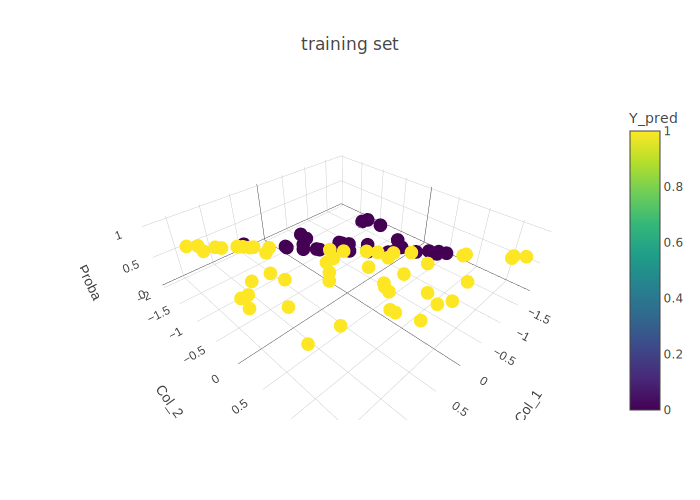

17. Use the library mlxtend to plot the decision boundary of the model. You might need to install it before : 
```python
!pip install mlxtend
```
This documentation page might help you 😉 : http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/

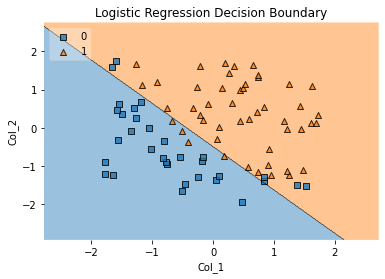